## MutClust Output analysis and occurrence matrix creation - Total patients - Only Hugo - q-value < 1

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
import sklearn

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/MutClust_output_definitivo")

REMEMBER: 
- from MutSig2CV I selected the genes with q-value < 1 
- in input to MutClust I just gave the Hugo symbols without the variant classifications

### Genes significantly mutated both in the Triple-Negative and NON Triple-Negative datasets (qval < 1)

In [3]:
# I run MutClust on the TOTAL DATASET intersected with the significant genes from MutSig2CV
df_mutclust_q1_TNandNONTN_onlyHugo = pd.read_csv('Output_onlyHugo_TNandNONTN_q1_definitivo.txt', delimiter='\t', engine='python')
df_mutclust_q1_TNandNONTN_onlyHugo

,Gene,Start,End,Scoresum,Recursion,Mutation,NES,Pvalue
0,TP53,270,282,0.085953,Y,78,14.386346,0.000000
1,TP53,191,199,0.079947,Y,65,13.057241,0.000000
2,TP53,236,258,0.077052,Y,94,12.416489,0.000000
3,TP53,173,177,0.061644,Y,47,9.006569,0.000000
4,TP53,211,218,0.030277,Y,32,2.064470,0.029703
...,...,...,...,...,...,...,...,...
3435,GNL3L,17,17,0.098282,N,1,-2.301614,0.990099
3436,GNL3L,121,121,0.098282,N,1,-2.301614,0.990099
3437,GNL3L,303,303,0.098282,N,1,-2.301614,0.990099
3438,GNL3L,495,495,0.098282,N,1,-2.301614,0.990099


In [4]:
# sort the dataframe by ascending order of Pvalue (from the most significant mutation to the least significant)
df_mutclust_q1_TNandNONTN_onlyHugo = df_mutclust_q1_TNandNONTN_onlyHugo.sort_values('Pvalue')
df_mutclust_q1_TNandNONTN_onlyHugo

,Gene,Start,End,Scoresum,Recursion,Mutation,NES,Pvalue
0,TP53,270,282,0.085953,Y,78,14.386346,0.000000
42,PIK3CA,541,542,0.107077,Y,56,29.726645,0.000000
43,PIK3CA,345,345,0.059375,N,31,14.407056,0.000000
44,PIK3CA,102,113,0.037354,Y,26,7.334854,0.000000
1853,ZNF195,109,111,0.493618,Y,8,7.342227,0.000000
...,...,...,...,...,...,...,...,...
1221,UBAP2,118,118,0.076029,N,1,-2.235840,0.990099
1222,UBAP2,187,187,0.076029,N,1,-2.235840,0.990099
1223,UBAP2,280,280,0.076029,N,1,-2.235840,0.990099
1212,MAP3K1,1425,1425,0.004957,N,1,-3.199907,0.990099


**Relevant_cluster** : creates a dictionary containing values from 0.01 to 1 (with an interval of 0.01), in which each value is associated to the number of genes with p-value lower than the value itself.

In [5]:
# define a function that gives in output the number of relevant clusters at different p-values
def Relevant_cluster (df_mutclust):
    n_relevant_clusters = {}   
    for i in np.arange(0.01, 1, 0.01):
        n_relevant_clusters[i]=len(df_mutclust[df_mutclust.Pvalue<i]) 
    return (n_relevant_clusters)

In [6]:
n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo = Relevant_cluster(df_mutclust_q1_TNandNONTN_onlyHugo)
n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo

{0.01: 37,
 0.02: 42,
 0.03: 45,
 0.04: 47,
 0.05: 50,
 0.060000000000000005: 51,
 0.06999999999999999: 52,
 0.08: 56,
 0.09: 56,
 0.09999999999999999: 62,
 0.11: 65,
 0.12: 66,
 0.13: 72,
 0.14: 73,
 0.15000000000000002: 74,
 0.16: 75,
 0.17: 75,
 0.18000000000000002: 77,
 0.19: 79,
 0.2: 80,
 0.21000000000000002: 83,
 0.22: 87,
 0.23: 88,
 0.24000000000000002: 88,
 0.25: 88,
 0.26: 91,
 0.27: 95,
 0.28: 96,
 0.29000000000000004: 97,
 0.3: 97,
 0.31: 100,
 0.32: 102,
 0.33: 102,
 0.34: 102,
 0.35000000000000003: 102,
 0.36000000000000004: 102,
 0.37: 104,
 0.38: 106,
 0.39: 107,
 0.4: 108,
 0.41000000000000003: 108,
 0.42000000000000004: 110,
 0.43: 113,
 0.44: 113,
 0.45: 114,
 0.46: 114,
 0.47000000000000003: 115,
 0.48000000000000004: 116,
 0.49: 118,
 0.5: 118,
 0.51: 121,
 0.52: 121,
 0.53: 122,
 0.54: 123,
 0.55: 124,
 0.56: 126,
 0.5700000000000001: 129,
 0.5800000000000001: 133,
 0.59: 135,
 0.6: 138,
 0.61: 141,
 0.62: 143,
 0.63: 151,
 0.64: 151,
 0.65: 151,
 0.66: 152,
 0.6

In [7]:
# count how many clusters have p-value = 0 
len(df_mutclust_q1_TNandNONTN_onlyHugo.loc[df_mutclust_q1_TNandNONTN_onlyHugo['Pvalue'] == 0.000000])

32

In [8]:
# convert the dictionary into a Dataframe
df_n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo = pd.DataFrame.from_dict(n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo, orient='index')
df_n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo.rename(columns={0: "Significant clusters"}, inplace=True)
df_n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo.reset_index(level=0, inplace=True)
df_n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo.rename(columns={"index": "P-value"}, inplace=True)
df_n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo

,P-value,Significant clusters
0,0.01,37
1,0.02,42
2,0.03,45
3,0.04,47
4,0.05,50
...,...,...
94,0.95,331
95,0.96,338
96,0.97,350
97,0.98,366


### Plot the number of significant clusters as the p-value varies

Define a function to plot the number of significant clusters as the p-value varies.

In [9]:
def Grafico_Clusters_significativi_one_dataset(df_n_rel_clusters_mutclust, caso):
    casistica_titolo = 'Significant hotspots as the p-value varies - XXX'
    casistica_titolo = casistica_titolo.replace('XXX',caso)
    casistica_legenda = 'Significant hotspots determined by the XXX'
    casistica_legenda = casistica_legenda.replace('XXX', caso)
    
    df_n_rel_clusters_mutclust_copy = df_n_rel_clusters_mutclust.copy()
    df_n_rel_clusters_mutclust_copy = df_n_rel_clusters_mutclust_copy.set_index('P-value')
    
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.plot(df_n_rel_clusters_mutclust_copy, label = casistica_legenda, color = 'blue')
    plt.xlabel('P-value', fontsize=13)
    plt.ylabel('Number of significant hotspots', fontsize=13)
    plt.legend(loc='lower left', bbox_to_anchor=(0.0, -0.2), fontsize='large')
    #plt.title(casistica_titolo,fontsize= 18)

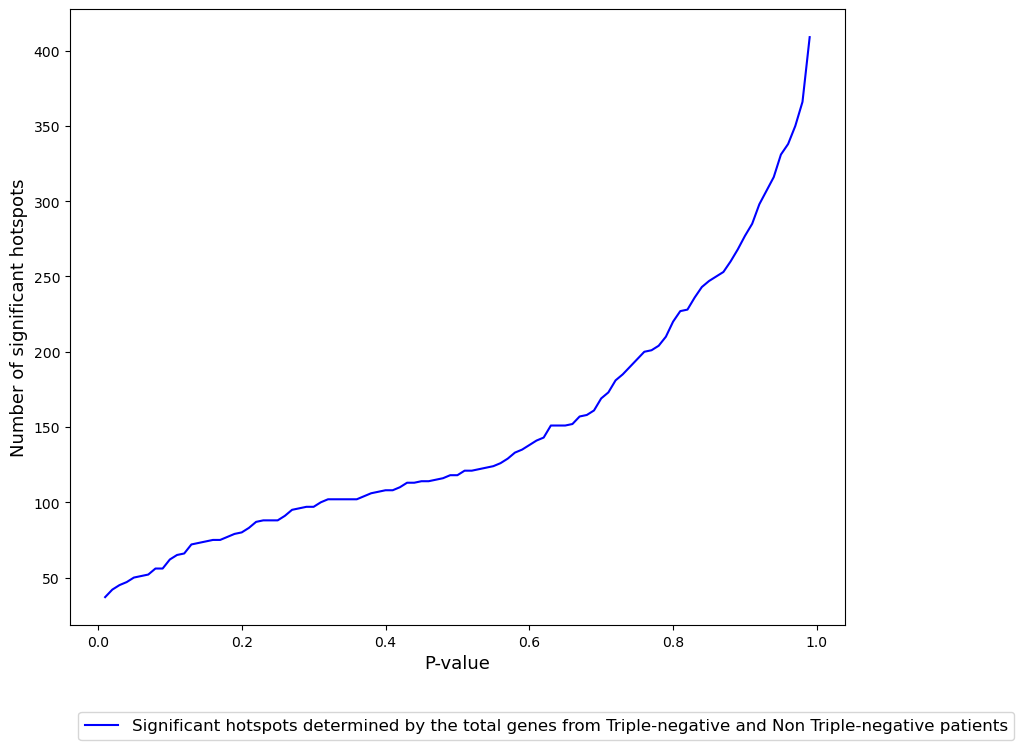

In [10]:
Grafico_Clusters_significativi_one_dataset(df_n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo, 'total genes from Triple-negative and Non Triple-negative patients')

In [11]:
df_n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo

,P-value,Significant clusters
0,0.01,37
1,0.02,42
2,0.03,45
3,0.04,47
4,0.05,50
...,...,...
94,0.95,331
95,0.96,338
96,0.97,350
97,0.98,366


In [12]:
def Grafico_Clusters_significativi_one_dataset(df_n_rel_clusters_mutclust):

    
    df_n_rel_clusters_mutclust_copy = df_n_rel_clusters_mutclust.copy()
    df_n_rel_clusters_mutclust_copy = df_n_rel_clusters_mutclust_copy.set_index('P-value')
    
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.plot(df_n_rel_clusters_mutclust_copy, color = 'blue')
    plt.axvline(x=0.05, color='red', linestyle='-', linewidth = 1)
    plt.xlabel('p-value', fontsize=13)
    plt.ylabel('Number of significant hotspots', fontsize=13)



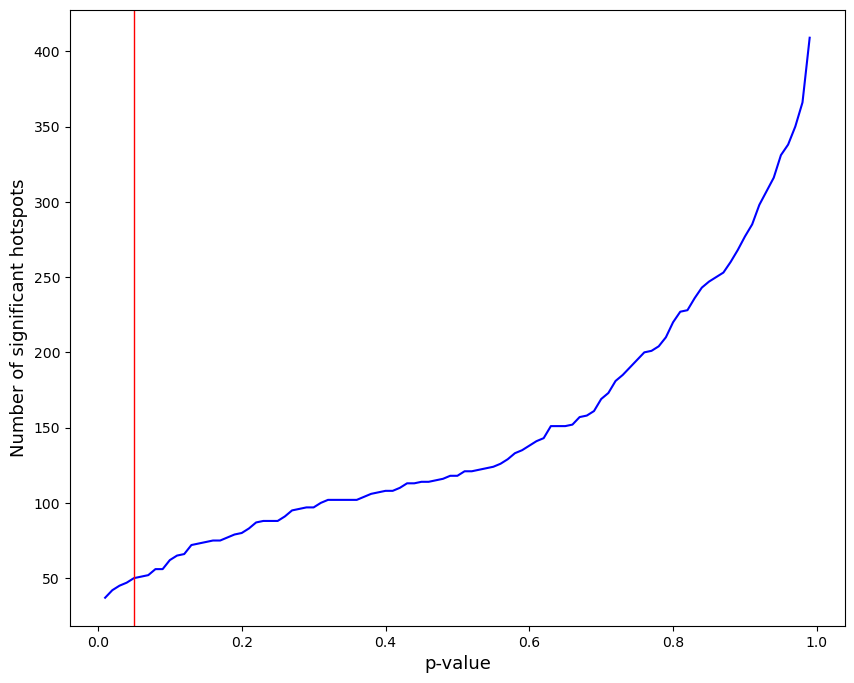

In [13]:
Grafico_Clusters_significativi_one_dataset(df_n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo)

### Look at the clusters with a p-value < 0.05

**Freq_cluster**: this function takes as input the output of MutClust containing the clusters associated to a p-value and a specific p-value. The output is a subset of the original dataframe containing only the clusters with a p-value < seleceted p-value.

In [14]:
def Freq_cluster (df, val):
    freq_clusters = df[(df.Pvalue<val)]
    return (freq_clusters)

In [15]:
# Genes significantly mutated both in the Triple-Negative dataset and in the non Triple-Negative dataset (qval < 1)
freq_cluster_q1_TNandNONTN_onlyHugo = Freq_cluster(df_mutclust_q1_TNandNONTN_onlyHugo, 0.05)
freq_cluster_q1_TNandNONTN_onlyHugo = freq_cluster_q1_TNandNONTN_onlyHugo.reset_index(drop=True)
freq_cluster_q1_TNandNONTN_onlyHugo

,Gene,Start,End,Scoresum,Recursion,Mutation,NES,Pvalue
0,TP53,270,282,0.085953,Y,78,14.386346,0.000000
1,PIK3CA,541,542,0.107077,Y,56,29.726645,0.000000
2,PIK3CA,345,345,0.059375,N,31,14.407056,0.000000
3,PIK3CA,102,113,0.037354,Y,26,7.334854,0.000000
4,ZNF195,109,111,0.493618,Y,8,7.342227,0.000000
5,MAML3,503,503,0.388010,Y,7,5.983467,0.000000
6,PIK3R1,566,578,0.327791,Y,12,10.770210,0.000000
7,ZNF814,303,311,0.463812,Y,13,10.020026,0.000000
8,RBM27,719,719,0.356199,Y,5,3.409619,0.000000
9,KRAS,12,12,0.812891,N,9,9.428031,0.000000


In [16]:
len(freq_cluster_q1_TNandNONTN_onlyHugo)

50

There are 50 significant clusters (p-value < 0.05) considering all the relevant genes in BOTH the Triple-negative dataset and the NON Triple-Negative dataset.

# Occurrence Matrix Creation

In [17]:
# load the mutation dataset resulting from the intersection between the significant TN and NON TN genes from MutSig and the total ductal dataset
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/MutClust_input_definitivo")
significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo_Q1 = pd.read_csv('data_mutation_SINIFICANTgenes_ONLYhugo_bothTNandNONTN_Q1_definitivo.txt', sep=None, engine='python')
significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo_Q1

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,...,HGVSc,HGVSp_Short,Transcript_ID,Gene_length,ENSP,Hugo_variant,Mutation_length,Protein_position_start,Protein_position_end,Protein_length
0,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,TP53,17,7574003.0,7574003.0,Nonsense_Mutation,SNP,G,G,...,ENST00000269305.4:c.1024C>T,p.R342*,ENST00000269305,25760,NaN,TP53_Nonsense_Mutation,1.0,342.0,342.0,393
1,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,PIK3CA,3,178952150.0,178952151.0,Frame_Shift_Ins,INS,-,-,...,ENST00000263967.3:c.3205_3206insTTTT,p.*1069Ffs*5,ENST00000263967,91980,NaN,PIK3CA_Frame_Shift_Ins,2.0,1069.0,1069.0,1068
2,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,TP53,17,7577117.0,7577117.0,Missense_Mutation,SNP,A,A,...,ENST00000269305.4:c.821T>G,p.V274G,ENST00000269305,25760,NaN,TP53_Missense_Mutation,1.0,274.0,274.0,393
3,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,MAML3,4,140811082.0,140811083.0,In_Frame_Ins,INS,-,-,...,ENST00000509479.2:c.1508_1509insCAA,p.Q503delinsHK,ENST00000509479,437432,NaN,MAML3_In_Frame_Ins,2.0,503.0,503.0,1138
4,brca_smc_2018_BB01_005,brca_smc_2018_BB01_005,SF3B4,1,149895518.0,149895518.0,Missense_Mutation,SNP,C,C,...,ENST00000271628.8:c.1191G>T,p.Q397H,ENST00000271628,5028,NaN,SF3B4_Missense_Mutation,1.0,397.0,397.0,424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,MBCProject_ygcMFgCR,RP-1156_MBCProject_ygcMFgCR_T1A_v1_Exome,LAMB3,1,209801520.0,209801520.0,Missense_Mutation,SNP,G,G,...,ENST00000356082.4:c.1148C>T,p.P383L,ENST00000356082,37597,NaN,LAMB3_Missense_Mutation,1.0,383.0,383.0,1172
6603,MBCProject_ygcMFgCR,RP-1156_MBCProject_ygcMFgCR_T1A_v1_Exome,BYSL,6,41900245.0,41900245.0,Missense_Mutation,SNP,G,G,...,ENST00000230340.4:c.1115G>A,p.R372H,ENST00000230340,11859,NaN,BYSL_Missense_Mutation,1.0,372.0,372.0,437
6604,MBCProject_ygcMFgCR,RP-1156_MBCProject_ygcMFgCR_T1A_v1_Exome,FBRSL1,12,133151136.0,133151136.0,Nonsense_Mutation,SNP,C,C,...,ENST00000434748.2:c.1816C>T,p.Q606*,ENST00000434748,95638,NaN,FBRSL1_Nonsense_Mutation,1.0,606.0,606.0,1045
6605,MBCProject_ygcMFgCR,RP-1156_MBCProject_ygcMFgCR_T1A_v1_Exome,GATA3,10,8111513.0,8111514.0,Frame_Shift_Ins,INS,-,-,...,ENST00000346208.3:c.1003dup,p.D335Gfs*17,ENST00000346208,21595,NaN,GATA3_Frame_Shift_Ins,2.0,333.0,333.0,444


In [18]:
significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo_Q1.PATIENT_ID.nunique()

1457

In [19]:
significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo_Q1.Hugo_Symbol.nunique()

309

In [20]:
unique_Hugo_symbols_array = significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo_Q1.Hugo_Symbol.unique()
unique_Hugo_symbols_array

array(['TP53', 'PIK3CA', 'MAML3', 'SF3B4', 'NF1', 'ACACB', 'CXorf38',
       'COL5A3', 'KMT2C', 'PTEN', 'ZNF19', 'GPRIN1', 'NIPBL', 'ITPKB',
       'FBRSL1', 'PALB2', 'CBFB', 'ARID1A', 'JMJD6', 'ZNF546', 'SEC63',
       'GATA3', 'COL17A1', 'NOTCH2', 'CFTR', 'RAD54B', 'PNN', 'SPEN',
       'DNAH12', 'PRB2', 'ERBB2', 'MAP2K4', 'ASH1L', 'PODXL2', 'TUBD1',
       'FOXA1', 'KIAA1109', 'RSBN1L', 'CTCF', 'HIST1H3B', 'SZT2',
       'MTHFD1L', 'DOCK11', 'IL31RA', 'FBXO18', 'MCRS1', 'SNX16',
       'OSBPL8', 'ZC3H4', 'AKT1', 'NCOR1', 'ASXL2', 'MAP3K1', 'UBAP2',
       'ERBB3', 'MYB', 'TRPM8', 'WDR44', 'ATM', 'PBRM1', 'CDKN2A',
       'TRIP11', 'USP8', 'FGF18', 'CYP3A4', 'BLK', 'BRCA2', 'EPG5',
       'SELP', 'ZFHX3', 'SF3B3', 'SMARCA1', 'FOXP1', 'KLHDC2', 'CDH1',
       'KIAA0195', 'ZMYND8', 'ICOSLG', 'TAF7L', 'TBX3', 'ORC2', 'ESF1',
       'FBXW7', 'ANKRD37', 'ANKHD1', 'FAM107B', 'HPD', 'RUNX1', 'STAG2',
       'PTPN22', 'GLDC', 'C3orf70', 'FKBP4', 'FMO5', 'RB1', 'ABCG2',
       'LRCH3', 'CHRM1

In [21]:
df_unique_Hugo_symbols = pd.DataFrame(unique_Hugo_symbols_array, columns=['Hugo_Symbol'])
df_unique_Hugo_symbols

,Hugo_Symbol
0,TP53
1,PIK3CA
2,MAML3
3,SF3B4
4,NF1
...,...
304,PLTP
305,PODXL
306,HMBS
307,EIF3C


In [22]:
# load the total ductal mutation dataset with the corrected protein_positions end and start
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
total_ductal_dataset = pd.read_csv('data_mutation_total_ductal_nohypo_nohyper_CORRECTION_protein_pos_definitivo.csv', sep=None, engine='python')
total_ductal_dataset

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Transcript_ID,Gene_length,ENSP,Hugo_variant,Mutation_length,Protein_position_start,Protein_position_end
0,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,KALRN,3,123988087.0,123988087.0,Missense_Mutation,SNP,G,G,C,ENST00000240874.3:c.948G>C,p.E316D,ENST00000240874,646303,NaN,KALRN_Missense_Mutation,1.0,316.0,316.0
1,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,ANK2,4,114195720.0,114195720.0,Missense_Mutation,SNP,C,C,T,ENST00000357077.4:c.1598C>T,p.P533L,ENST00000357077,565632,NaN,ANK2_Missense_Mutation,1.0,533.0,533.0
2,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,SORBS2,4,186539742.0,186539742.0,Missense_Mutation,SNP,G,G,C,ENST00000355634.5:c.2936C>G,p.S979C,ENST00000355634,371209,NaN,SORBS2_Missense_Mutation,1.0,979.0,979.0
3,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,PCDHA11,5,140250828.0,140250828.0,Missense_Mutation,SNP,C,C,G,ENST00000398640.2:c.2140C>G,p.L714V,ENST00000398640,143241,NaN,PCDHA11_Missense_Mutation,1.0,714.0,714.0
4,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,WRNIP1,6,2766210.0,2766210.0,Missense_Mutation,SNP,C,C,A,ENST00000380773.4:c.354C>A,p.S118R,ENST00000380773,21539,NaN,WRNIP1_Missense_Mutation,1.0,118.0,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139365,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,NRSN2,20,333991.0,333991.0,Silent,SNP,C,C,T,ENST00000382285.2:c.327C>T,p.N109=,ENST00000382285,12879,NaN,NRSN2_Silent,1.0,109.0,109.0
139366,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61986887.0,61986887.0,Intron,SNP,G,G,C,ENST00000370263.4:c.383+440C>G,p.*128*,ENST00000370263,34334,NaN,CHRNA4_Intron,1.0,NaN,NaN
139367,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61987386.0,61987386.0,Silent,SNP,G,G,A,ENST00000370263.4:c.324C>T,p.V108=,ENST00000370263,34334,NaN,CHRNA4_Silent,1.0,108.0,108.0
139368,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,KCNQ2,20,62078103.0,62078103.0,Silent,SNP,G,G,A,ENST00000359125.2:c.384C>T,p.I128=,ENST00000359125,66452,NaN,KCNQ2_Silent,1.0,128.0,128.0


### Columns of the occurence matrix: hotspots found by MutClust and mutations on genes not belonging to any hotspot (columns that are marked with the suffix noClust)

In [23]:
# creo la lista delle colonne della matrice di occorrenza
def CreatingColumns_OccMatrix(freq_cluster_x, df_Hugo_unique):
    columns = []

    for index_clust, row_clust in freq_cluster_x.iterrows():
        columns.append(row_clust.Gene + '_' + str(row_clust.Start) + '_' + str(row_clust.End)) 
    
    #aggiungo le colonne per le mutazioni che non sono presenti in nessun cluster
    for index_mut, row_mut in df_Hugo_unique.iterrows():
        columns.append(row_mut.Hugo_Symbol + '_noClust')
    
    return columns

In [24]:
columns_occ_matrix_TNandNONTNgenes_q1_onlyHugo = CreatingColumns_OccMatrix (freq_cluster_q1_TNandNONTN_onlyHugo, df_unique_Hugo_symbols)
columns_occ_matrix_TNandNONTNgenes_q1_onlyHugo

['TP53_270_282',
 'PIK3CA_541_542',
 'PIK3CA_345_345',
 'PIK3CA_102_113',
 'ZNF195_109_111',
 'MAML3_503_503',
 'PIK3R1_566_578',
 'ZNF814_303_311',
 'RBM27_719_719',
 'KRAS_12_12',
 'ZKSCAN1_270_270',
 'GATA3_308_335',
 'GATA3_406_408',
 'GATA3_429_434',
 'MTMR12_520_521',
 'ZNF208_548_549',
 'FAM208B_805_805',
 'PRB2_81_81',
 'ERBB2_767_777',
 'SF3B1_700_700',
 'FOXA1_254_268',
 'NUP93_14_15',
 'CTCF_283_288',
 'MYL10_26_26',
 'ESR1_380_380',
 'ESR1_537_538',
 'PIK3CA_545_546',
 'PIK3CA_1046_1047',
 'AKT1_17_17',
 'TP53_191_199',
 'TP53_236_258',
 'TP53_173_177',
 'USP8_523_523',
 'RUNX1_122_123',
 'TBX3_210_218',
 'CHD9_2120_2120',
 'ZNF19_280_280',
 'COL17A1_90_106',
 'ERBB3_928_928',
 'ABCG2_22_32',
 'FAM193A_1170_1214',
 'RCC2_271_278',
 'PTEN_317_318',
 'FHDC1_57_57',
 'TP53_211_218',
 'FGFR2_549_549',
 'DAP3_331_331',
 'MAP4K3_395_415',
 'PTEN_128_131',
 'PIK3CA_418_420',
 'TP53_noClust',
 'PIK3CA_noClust',
 'MAML3_noClust',
 'SF3B4_noClust',
 'NF1_noClust',
 'ACACB_noClust',
 

In [25]:
len(columns_occ_matrix_TNandNONTNgenes_q1_onlyHugo)

359

In [26]:
# convert the list of columns into a dataframe
df_columns_occ_matrix_onlyHugo = pd.DataFrame(columns_occ_matrix_TNandNONTNgenes_q1_onlyHugo, columns=['columns_occurence_matrix'])
df_columns_occ_matrix_onlyHugo

,columns_occurence_matrix
0,TP53_270_282
1,PIK3CA_541_542
2,PIK3CA_345_345
3,PIK3CA_102_113
4,ZNF195_109_111
...,...
354,PLTP_noClust
355,PODXL_noClust
356,HMBS_noClust
357,EIF3C_noClust


### Rows of the occurence matrix: Patient IDs

In [27]:
# Create the rows for the occurrence matrix
# NOTE: consider directly the mutation dataset that is the result of the intersection between the significant mutations from MutSig and the total ductal dataset
# There are not the total ductal patients (1551) but just 1462, because not all the patients have mutations on the significant genes 
unique_patientIDs_with_sign_mut = significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo_Q1.PATIENT_ID.unique()
unique_patientIDs_with_sign_mut

array(['brca_smc_2018_BB01_002', 'brca_smc_2018_BB01_004',
       'brca_smc_2018_BB01_005', ..., 'MBCProject_yZSnSluK',
       'MBCProject_ygcMFgCR', 'MBCProject_zyt5TKFB'], dtype=object)

In [28]:
len(unique_patientIDs_with_sign_mut)

1457

### Creation zeros matrix 

In [29]:
def Matrice_zeri (columns, rows):
    df = pd.DataFrame(index=rows, columns=columns)
    df = df.fillna(0)
    return(df)

In [30]:
matrix_zeros_TNandNONTN_q1_onlyHugo = Matrice_zeri(columns_occ_matrix_TNandNONTNgenes_q1_onlyHugo, unique_patientIDs_with_sign_mut)
matrix_zeros_TNandNONTN_q1_onlyHugo

,TP53_270_282,PIK3CA_541_542,PIK3CA_345_345,PIK3CA_102_113,ZNF195_109_111,MAML3_503_503,PIK3R1_566_578,ZNF814_303_311,RBM27_719_719,KRAS_12_12,...,CDC73_noClust,MTA2_noClust,GAS8_noClust,AP1S3_noClust,OR6B1_noClust,PLTP_noClust,PODXL_noClust,HMBS_noClust,EIF3C_noClust,KRTAP5-1_noClust
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The occurence matrix has 1457 rows (patients) and 359 columns (gene clust and noClust).

**NOTE:** 50 genes form clusters (the start and end positions of the clusters are indicated).



### Fill the matrix with values

In [31]:
def Riempimento_matrice(df_sign_mutations, matrix, freq_cluster):
    for index_mut, row_mut in df_sign_mutations.iterrows():
        found = False
        gene = row_mut.at['Hugo_Symbol']
        #consequence = row_mut.at['Variant_Classification']
        patient = row_mut.at['PATIENT_ID']
        position_start = row_mut.at['Protein_position_start']
        position_end = row_mut.at['Protein_position_end']
        
        for index_cluster, row_cluster in freq_cluster.iterrows():
            if (gene == row_cluster['Gene']) and (
                ((position_start >= row_cluster['Start']) and (position_start <= row_cluster['End'])) or 
                ((position_end >= row_cluster['Start']) and (position_end <= row_cluster['End']))
            ):
                matrix.at[patient, (gene + '_'+ str(row_cluster['Start']) + '_' + str(row_cluster['End']))] += 1
                found = True
                break
                
        if not found:
            matrix.at[patient, gene + '_noClust'] += 1
    
    return matrix

In [32]:
df_occurrence_matrix_TNandNONTNrelgenes_q1_onlyHugo = Riempimento_matrice(significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo_Q1, matrix_zeros_TNandNONTN_q1_onlyHugo, freq_cluster_q1_TNandNONTN_onlyHugo)
df_occurrence_matrix_TNandNONTNrelgenes_q1_onlyHugo

,TP53_270_282,PIK3CA_541_542,PIK3CA_345_345,PIK3CA_102_113,ZNF195_109_111,MAML3_503_503,PIK3R1_566_578,ZNF814_303_311,RBM27_719_719,KRAS_12_12,...,CDC73_noClust,MTA2_noClust,GAS8_noClust,AP1S3_noClust,OR6B1_noClust,PLTP_noClust,PODXL_noClust,HMBS_noClust,EIF3C_noClust,KRTAP5-1_noClust
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# count the total number of values in the matrix, i.e., the total number of mutations
df_occurrence_matrix_TNandNONTNrelgenes_q1_onlyHugo.sum().sum()

6607

In [34]:
# count the number of rows containing all zero values 
df_occurrence_matrix_TNandNONTNrelgenes_q1_onlyHugo[(df_occurrence_matrix_TNandNONTNrelgenes_q1_onlyHugo == 0).all(axis=1)]

,TP53_270_282,PIK3CA_541_542,PIK3CA_345_345,PIK3CA_102_113,ZNF195_109_111,MAML3_503_503,PIK3R1_566_578,ZNF814_303_311,RBM27_719_719,KRAS_12_12,...,CDC73_noClust,MTA2_noClust,GAS8_noClust,AP1S3_noClust,OR6B1_noClust,PLTP_noClust,PODXL_noClust,HMBS_noClust,EIF3C_noClust,KRTAP5-1_noClust


There aren't patients with no mutations in the significant genes.

In [35]:
# number of columns containing all zero values 
(df_occurrence_matrix_TNandNONTNrelgenes_q1_onlyHugo == 0).all().sum()

0

In [36]:
# sum the values for each row (patients): mutations for each patient
mutations_for_each_patient = df_occurrence_matrix_TNandNONTNrelgenes_q1_onlyHugo.sum(axis=1).to_frame()
mutations_for_each_patient.rename(columns={0: "Mutation count for each patient"}, inplace=True)
mutations_for_each_patient

,Mutation count for each patient
brca_smc_2018_BB01_002,2
brca_smc_2018_BB01_004,2
brca_smc_2018_BB01_005,4
brca_smc_2018_BB01_006,2
brca_smc_2018_BB01_008,1
...,...
MBCProject_xlhkS5CG,3
MBCProject_xoHAF6s8,10
MBCProject_yZSnSluK,3
MBCProject_ygcMFgCR,5


In [52]:
mutations_for_each_patient.sum()

Mutation count for each patient    6607
dtype: int64

### Label the TN patients with 1 and the NON TN patients with 0

In [38]:
# Load the total TN mutation dataset and select the TN patients 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
data_mutation_ductal_total_TN = pd.read_csv('mutation_table_ALL_DATASETS_ductal_TN_nohypo_nohyper.csv', sep=None, engine='python')
data_mutation_ductal_total_TN

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length,ENSP
0,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,TMEM131,2,98460725.0,98460725.0,Splice_Site,SNP,C,C,T,ENST00000186436.5:c.484-1G>A,p.X162_splice,162.0,ENST00000186436,239590,NaN
1,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,DNAAF1,16,84188289.0,84188289.0,Missense_Mutation,SNP,C,C,T,ENST00000378553.5:c.460C>T,p.R154C,154.0,ENST00000378553,33509,NaN
2,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,TP53,17,7577117.0,7577117.0,Missense_Mutation,SNP,A,A,C,ENST00000269305.4:c.821T>G,p.V274G,274.0,ENST00000269305,25760,NaN
3,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,MATK,19,3778305.0,3778305.0,Missense_Mutation,SNP,C,C,A,ENST00000395045.2:c.1403G>T,p.R468L,468.0,ENST00000395045,24157,NaN
4,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,BAX,19,49459542.0,49459542.0,Nonsense_Mutation,SNP,G,G,A,ENST00000293288.8:c.321G>A,p.W107*,107.0,ENST00000293288,6984,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31982,MBCProject_wzCxuoio,MBC-MBCProject_wzCxuoio-Tumor-SM-GQCHG,VAV1,19,6836477.0,6836477.0,Silent,SNP,C,C,T,ENST00000602142.1:c.1812C>T,p.Y604=,604.0,ENST00000602142,84653,NaN
31983,MBCProject_wzCxuoio,MBC-MBCProject_wzCxuoio-Tumor-SM-GQCHG,ADA,20,43251667.0,43251667.0,Missense_Mutation,SNP,G,G,A,ENST00000372874.4:c.659C>T,p.S220L,220.0,ENST00000372874,32712,NaN
31984,MBCProject_wzCxuoio,MBC-MBCProject_wzCxuoio-Tumor-SM-GQCHG,ABCG1,21,43711661.0,43711661.0,Silent,SNP,G,G,A,ENST00000361802.2:c.1584G>A,p.P528=,528.0,ENST00000361802,97556,NaN
31985,MBCProject_wzCxuoio,MBC-MBCProject_wzCxuoio-Tumor-SM-GQCHG,TRPM2,21,45784140.0,45784140.0,Missense_Mutation,SNP,C,C,T,ENST00000300482.5:c.398C>T,p.T133M,133.0,ENST00000300482,92919,NaN


In [39]:
data_mutation_ductal_total_TN.PATIENT_ID.nunique()

293

In [56]:
all_TN_pts = data_mutation_ductal_total_TN[['PATIENT_ID']]
all_TN_pts = all_TN_pts.drop_duplicates()
all_TN_pts

,PATIENT_ID
0,brca_smc_2018_BB01_004
6,brca_smc_2018_BB01_022
14,brca_smc_2018_BB01_026
85,brca_smc_2018_BB01_035
98,brca_smc_2018_BB01_037
...,...
31427,MBCProject_lQtMtjFR
31569,MBCProject_oqupfDu7
31711,MBCProject_pMcWcrtZ
31853,MBCProject_rJHBiKTl


In [40]:
unique_patientsID_TN = data_mutation_ductal_total_TN['PATIENT_ID'].unique()
len(unique_patientsID_TN)

293

In [41]:
# Load the total NON TN mutation dataset and select the NON TN patients 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
data_mutation_ductal_total_NON_TN = pd.read_csv('mutation_table_ALL_DATASETS_ductal_NONTN_nohypo_nohyper.csv', sep=None, engine='python') 
data_mutation_ductal_total_NON_TN

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length,ENSP
0,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,KALRN,3,123988087.0,123988087.0,Missense_Mutation,SNP,G,G,C,ENST00000240874.3:c.948G>C,p.E316D,316.0,ENST00000240874,646303,NaN
1,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,ANK2,4,114195720.0,114195720.0,Missense_Mutation,SNP,C,C,T,ENST00000357077.4:c.1598C>T,p.P533L,533.0,ENST00000357077,565632,NaN
2,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,SORBS2,4,186539742.0,186539742.0,Missense_Mutation,SNP,G,G,C,ENST00000355634.5:c.2936C>G,p.S979C,979.0,ENST00000355634,371209,NaN
3,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,PCDHA11,5,140250828.0,140250828.0,Missense_Mutation,SNP,C,C,G,ENST00000398640.2:c.2140C>G,p.L714V,714.0,ENST00000398640,143241,NaN
4,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,WRNIP1,6,2766210.0,2766210.0,Missense_Mutation,SNP,C,C,A,ENST00000380773.4:c.354C>A,p.S118R,118.0,ENST00000380773,21539,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107378,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,NRSN2,20,333991.0,333991.0,Silent,SNP,C,C,T,ENST00000382285.2:c.327C>T,p.N109=,109.0,ENST00000382285,12879,NaN
107379,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61986887.0,61986887.0,Intron,SNP,G,G,C,ENST00000370263.4:c.383+440C>G,p.*128*,NaN,ENST00000370263,34334,NaN
107380,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61987386.0,61987386.0,Silent,SNP,G,G,A,ENST00000370263.4:c.324C>T,p.V108=,108.0,ENST00000370263,34334,NaN
107381,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,KCNQ2,20,62078103.0,62078103.0,Silent,SNP,G,G,A,ENST00000359125.2:c.384C>T,p.I128=,128.0,ENST00000359125,66452,NaN


In [42]:
data_mutation_ductal_total_NON_TN.PATIENT_ID.nunique()

1234

In [43]:
unique_patientsID_NONTN = data_mutation_ductal_total_NON_TN['PATIENT_ID'].unique()
unique_patientsID_NONTN

array(['brca_smc_2018_BB01_002', 'brca_smc_2018_BB01_005',
       'brca_smc_2018_BB01_006', ..., 'MBCProject_yZSnSluK',
       'MBCProject_ygcMFgCR', 'MBCProject_zyt5TKFB'], dtype=object)

In [44]:
len(unique_patientsID_NONTN)

1234

In [45]:
unique_patientIDs_with_sign_mut

array(['brca_smc_2018_BB01_002', 'brca_smc_2018_BB01_004',
       'brca_smc_2018_BB01_005', ..., 'MBCProject_yZSnSluK',
       'MBCProject_ygcMFgCR', 'MBCProject_zyt5TKFB'], dtype=object)

In [46]:
len(unique_patientIDs_with_sign_mut)

1457

In [47]:
# create the column with the target for each patient 
def target(indexes_patientID):
    TN_patientIDs = unique_patientsID_TN
    NON_TN_patientsIDs = unique_patientsID_NONTN
    
    target = pd.DataFrame(index=indexes_patientID, columns=['Target'])
    target['Target'] = 0  # Initialize all labels to 0
    
    for i in indexes_patientID:
        if i in TN_patientIDs:
            target.loc[i, 'Target'] = 1
    
    return (target)

In [48]:
target_relgenes_TNandNONTN_q1 = target(unique_patientIDs_with_sign_mut)
target_relgenes_TNandNONTN_q1

,Target
brca_smc_2018_BB01_002,0
brca_smc_2018_BB01_004,1
brca_smc_2018_BB01_005,0
brca_smc_2018_BB01_006,0
brca_smc_2018_BB01_008,0
...,...
MBCProject_xlhkS5CG,0
MBCProject_xoHAF6s8,0
MBCProject_yZSnSluK,0
MBCProject_ygcMFgCR,0


In [49]:
# add the label column to the occurrence matrix 
Matrix_TNandNONTNrelgenes_q1_withLabels_onlyHugo = df_occurrence_matrix_TNandNONTNrelgenes_q1_onlyHugo.assign(Target=target_relgenes_TNandNONTN_q1)
Matrix_TNandNONTNrelgenes_q1_withLabels_onlyHugo

,TP53_270_282,PIK3CA_541_542,PIK3CA_345_345,PIK3CA_102_113,ZNF195_109_111,MAML3_503_503,PIK3R1_566_578,ZNF814_303_311,RBM27_719_719,KRAS_12_12,...,MTA2_noClust,GAS8_noClust,AP1S3_noClust,OR6B1_noClust,PLTP_noClust,PODXL_noClust,HMBS_noClust,EIF3C_noClust,KRTAP5-1_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**NOTE:** 
- Label = 1 : TN patient
- Label = 0 : NON TN patient

In [50]:
# sum the values for each column (mutations)
mutations_sum = Matrix_TNandNONTNrelgenes_q1_withLabels_onlyHugo.sum().to_frame()
mutations_sum.rename(columns={0: "Mutation count"}, inplace=True)
mutations_sum 

,Mutation count
TP53_270_282,78
PIK3CA_541_542,56
PIK3CA_345_345,31
PIK3CA_102_113,26
ZNF195_109_111,8
...,...
PODXL_noClust,9
HMBS_noClust,5
EIF3C_noClust,2
KRTAP5-1_noClust,3


NOTE:
- 287 patients are Triple-Negative
- 1170 patients are NO Triple-Negative

In [51]:
# save the occurrence matrix 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data_definitivo")
Matrix_TNandNONTNrelgenes_q1_withLabels_onlyHugo.to_csv('Occurrence_Matrix_TNandNONTNrelgenes_q1_withLabels_ONLYHUGO_definitivo.csv', index=True, sep='\t')

### Study which TN patients are discarded because they don't contain mutations on the relevant genes from MutSig

In [53]:
# occurrence matrix with only TN patients 
Matrix_4A_withLabels = Matrix_TNandNONTNrelgenes_q1_withLabels_onlyHugo.loc[Matrix_TNandNONTNrelgenes_q1_withLabels_onlyHugo['Target']==1]
Matrix_4A_withLabels

,TP53_270_282,PIK3CA_541_542,PIK3CA_345_345,PIK3CA_102_113,ZNF195_109_111,MAML3_503_503,PIK3R1_566_578,ZNF814_303_311,RBM27_719_719,KRAS_12_12,...,MTA2_noClust,GAS8_noClust,AP1S3_noClust,OR6B1_noClust,PLTP_noClust,PODXL_noClust,HMBS_noClust,EIF3C_noClust,KRTAP5-1_noClust,Target
brca_smc_2018_BB01_004,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_lQtMtjFR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
TN_pts_4A = Matrix_4A_withLabels.index.to_list()
TN_pts_4A

['brca_smc_2018_BB01_004',
 'brca_smc_2018_BB01_022',
 'brca_smc_2018_BB01_026',
 'brca_smc_2018_BB01_035',
 'brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_040',
 'brca_smc_2018_BB01_041',
 'brca_smc_2018_BB01_044',
 'brca_smc_2018_BB01_059',
 'brca_smc_2018_BB01_067',
 'brca_smc_2018_BB01_074',
 'brca_smc_2018_BB01_079',
 'brca_smc_2018_BB01_094',
 'brca_smc_2018_BB01_099',
 'brca_smc_2018_BB01_109',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR017',
 'brca_smc_2018_BR041',
 'brca_smc_2018_BR091',
 'brca_smc_2018_BR094',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR108',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR164',
 'brca_smc_2018_BR200',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR313',
 'brca_smc_2018_BR367',
 'brca_smc_2018_BR393',
 'brca_smc_2018_BR395',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'BR-M-174',
 'PD3987a',
 'PD4002a',
 'PD4003a',
 'PD4091a',
 'PD4107a',
 'PD4109a',
 'PD4113a',
 'PD413

In [57]:
all_TN_pts

,PATIENT_ID
0,brca_smc_2018_BB01_004
6,brca_smc_2018_BB01_022
14,brca_smc_2018_BB01_026
85,brca_smc_2018_BB01_035
98,brca_smc_2018_BB01_037
...,...
31427,MBCProject_lQtMtjFR
31569,MBCProject_oqupfDu7
31711,MBCProject_pMcWcrtZ
31853,MBCProject_rJHBiKTl


In [59]:
# which are the 6 patients excluded from the analyses??
all_TN_pts[~all_TN_pts['PATIENT_ID'].isin(TN_pts_4A)]

,PATIENT_ID
1057,brca_smc_2018_BR078
1978,BR-M-080
9715,TCGA-A2-A25F
9855,TCGA-A2-A3XU
21601,TCGA-E2-A1LI
26219,MBC_127
